# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [4]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train).astype(np.int32)
X_test_s = ss.transform(X_test).astype(np.int32)

In [6]:
# y_train_c = to_categorical(y_train).astype(np.int32)
# y_test_c = to_categorical(y_test).astype(np.int32)

In [7]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, activation='relu'))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[])

By the way, here is a helpful blog post that goes carefully through a list of similarly-named different activation functions and loss functions: https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [15]:
history = model.fit(X_train_s, np.array(y_train), validation_data=(X_test_s, np.array(y_test)),
                   epochs=30, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 0s 55us/step - loss: 0.5666 - val_loss: 0.6349
Epoch 2/30
4872/4872 [==============================] - 0s 19us/step - loss: 0.5654 - val_loss: 0.6260
Epoch 3/30
4872/4872 [==============================] - 0s 20us/step - loss: 0.5634 - val_loss: 0.6237
Epoch 4/30
4872/4872 [==============================] - 0s 20us/step - loss: 0.5620 - val_loss: 0.6311
Epoch 5/30
4872/4872 [==============================] - 0s 21us/step - loss: 0.5605 - val_loss: 0.6199
Epoch 6/30
4872/4872 [==============================] - 0s 21us/step - loss: 0.5590 - val_loss: 0.6247
Epoch 7/30
4872/4872 [==============================] - 0s 22us/step - loss: 0.5602 - val_loss: 0.6249
Epoch 8/30
4872/4872 [==============================] - 0s 22us/step - loss: 0.5570 - val_loss: 0.6226
Epoch 9/30
4872/4872 [==============================] - 0s 22us/step - loss: 0.5565 - val_loss: 0.6203
Epoch 10/30
4872/4872 [==

In [16]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 1.43187135e-01,  4.27886456e-01, -2.84283787e-01,
        -8.80103856e-02, -1.58028156e-01,  1.37019113e-01,
         1.40133530e-01,  2.50524700e-01,  2.39715040e-01,
         3.83972675e-01, -3.41221362e-01, -1.48651168e-01],
       [-1.72412783e-01,  8.76029506e-02, -1.27503335e-01,
        -1.57289669e-01, -3.77562672e-01,  1.75958619e-01,
        -4.13995028e-01, -3.24251890e-01, -3.05952519e-01,
         1.54081821e-01,  8.39341208e-02,  5.89382127e-02],
       [-1.35312110e-01, -1.31631106e-01,  2.18480334e-01,
        -3.34048957e-01,  2.41696890e-02,  6.08352087e-02,
        -3.39007288e-01, -2.03762040e-01, -2.23380998e-01,
         3.00745249e-01,  3.89128715e-01,  4.44524914e-01],
       [ 3.35011125e-01, -1.32690117e-01,  3.64360631e-01,
         1.38358697e-01, -6.44914061e-02, -4.88442816e-02,
        -4.33702976e-01, -1.56356096e-02, -7.91288167e-02,
         5.52321851e-01,  1.13465942e-01,  1.70233287e-02],
       [-2.37263769e-01, -1.03057690e-01,  1.394673

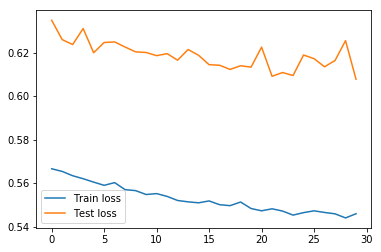

In [17]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

In [92]:
sum(abs(np.array(model.predict(X_test_s).T) - np.array(y_test))[0])

990.4296479225159

## Adding Regularization

Here's a helpful review article on regularization techniques: https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [60]:
from keras import regularizers

In [61]:
model_r = Sequential()

n_input = X_train_s.shape[1]

model_r.add(Dense(n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(1,
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(optimizer='adam', loss='mean_squared_error')

history_r = model_r.fit(X_train_s, np.array(y_train), validation_data=(X_test_s, np.array(y_test)),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 102us/step - loss: 21.8108 - val_loss: 14.7922
Epoch 2/42
4872/4872 [==============================] - 0s 21us/step - loss: 9.7715 - val_loss: 5.8281
Epoch 3/42
4872/4872 [==============================] - 0s 26us/step - loss: 4.5041 - val_loss: 3.5438
Epoch 4/42
4872/4872 [==============================] - 0s 24us/step - loss: 3.2176 - val_loss: 2.8193
Epoch 5/42
4872/4872 [==============================] - 0s 22us/step - loss: 2.5861 - val_loss: 2.3016
Epoch 6/42
4872/4872 [==============================] - 0s 22us/step - loss: 2.0847 - val_loss: 1.8772
Epoch 7/42
4872/4872 [==============================] - 0s 22us/step - loss: 1.6927 - val_loss: 1.5547
Epoch 8/42
4872/4872 [==============================] - 0s 21us/step - loss: 1.4036 - val_loss: 1.3056
Epoch 9/42
4872/4872 [==============================] - 0s 21us/step - loss: 1.1983 - val_loss: 1.1461
Epoch 10/42
4872/4872 

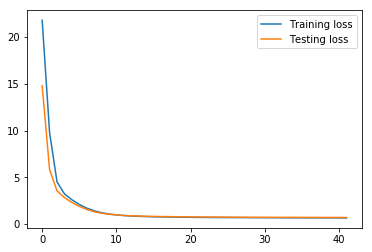

In [62]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

#### Examining Our Predictions

In [63]:
model_r.predict(X_test_s[:10]).round(2)

array([[5.71],
       [5.49],
       [4.65],
       [5.9 ],
       [4.93],
       [5.74],
       [5.56],
       [4.89],
       [5.56],
       [5.93]], dtype=float32)

In [64]:
y_test[:10]

930     5
143     5
1037    5
4212    5
1032    5
5236    7
4651    7
4       5
1091    6
1536    6
Name: quality, dtype: int64

In [65]:
model_r.predict(X_test_s).T

array([[5.7084174, 5.4947314, 4.6547422, ..., 6.0635967, 5.249396 ,
        6.2447305]], dtype=float32)

In [66]:
(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0]

array([ 0.70841742,  0.49473143, -0.34525776, ...,  1.06359673,
        0.24939585,  0.24473047])

In [91]:
sum(abs(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0])

988.8581104278564

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [69]:
from keras.layers import Dropout

In [70]:
model_d = Sequential()

n_input = X_train_s.shape[1]

model_d.add(Dense(n_input, activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(1))

model_d.compile(optimizer='adam', loss='mean_squared_error')

history_d = model_d.fit(X_train_s, np.array(y_train), validation_data=(X_test_s, np.array(y_test)),
                        epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 94us/step - loss: 27.6591 - val_loss: 20.3595
Epoch 2/42
4872/4872 [==============================] - 0s 25us/step - loss: 14.7398 - val_loss: 9.3959
Epoch 3/42
4872/4872 [==============================] - 0s 24us/step - loss: 7.2845 - val_loss: 4.2080
Epoch 4/42
4872/4872 [==============================] - 0s 27us/step - loss: 4.6226 - val_loss: 2.6519
Epoch 5/42
4872/4872 [==============================] - 0s 29us/step - loss: 3.8449 - val_loss: 2.0448
Epoch 6/42
4872/4872 [==============================] - 0s 27us/step - loss: 3.3207 - val_loss: 1.6960
Epoch 7/42
4872/4872 [==============================] - 0s 25us/step - loss: 2.8525 - val_loss: 1.4292
Epoch 8/42
4872/4872 [==============================] - 0s 28us/step - loss: 2.5892 - val_loss: 1.2295
Epoch 9/42
4872/4872 [==============================] - 0s 24us/step - loss: 2.3803 - val_loss: 1.0764
Epoch 10/42
4872/4872 

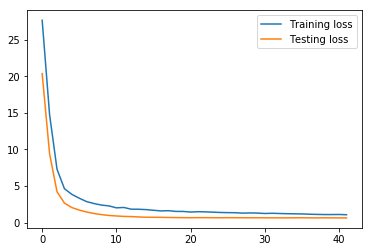

In [71]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [73]:
# history_d.history['acc'][-1], history_d.history['val_acc'][-1]

In [90]:
sum(abs(np.array(model_d.predict(X_test_s).T) - np.array(y_test))[0])

1002.72434425354

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [74]:
from keras.callbacks import EarlyStopping

In [76]:
model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(1))

model_es.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, np.array(y_train), validation_data=(X_test_s, np.array(y_test)),
                         epochs=40, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/40
4872/4872 [==============================] - 0s 93us/step - loss: 25.1607 - val_loss: 19.2411
Epoch 2/40
4872/4872 [==============================] - 0s 21us/step - loss: 14.3116 - val_loss: 10.1943
Epoch 3/40
4872/4872 [==============================] - 0s 21us/step - loss: 7.2812 - val_loss: 4.8679
Epoch 4/40
4872/4872 [==============================] - 0s 23us/step - loss: 3.7749 - val_loss: 2.7472
Epoch 5/40
4872/4872 [==============================] - 0s 23us/step - loss: 2.4138 - val_loss: 1.9364
Epoch 6/40
4872/4872 [==============================] - 0s 23us/step - loss: 1.8026 - val_loss: 1.5273
Epoch 7/40
4872/4872 [==============================] - 0s 23us/step - loss: 1.4544 - val_loss: 1.2747
Epoch 8/40
4872/4872 [==============================] - 0s 23us/step - loss: 1.2176 - val_loss: 1.0972
Epoch 9/40
4872/4872 [==============================] - 0s 23us/step - loss: 1.0500 - val_loss: 0.9634
Epoch 10/40
4872/4872

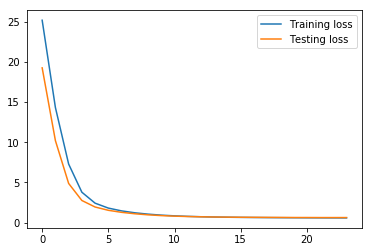

In [77]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();

In [88]:
sum(abs(np.array(model_es.predict(X_test_s).T) - np.array(y_test))[0])

1006.5832643508911